#                                            Analysis on Flipkart Mobile Data

### DATA COLLECTION

In [1]:
#import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import 'mobiles.csv' file using pandas to 'mob' variable
mob = pd.read_csv('mobiles.csv')

#show table
mob

,Product Name,Price,Original Prices,Discount rates,Ratings
0,"Realme 6 (Comet Blue, 128 GB)","16,999",NaN,Nan,4.4
1,"Redmi Note 8 Pro (Electric Blue, 128 GB)","17,785","17,999",1% off,4.5
2,"POCO X2 (Atlantis Blue, 128 GB)","18,499","18,999",2% off,4.5
3,"POCO X2 (Matrix Purple, 128 GB)","18,499","18,999",2% off,4.5
4,"Vivo Z1Pro (Sonic Black, 64 GB)","13,990","15,990",12% off,4.5
...,...,...,...,...,...
595,Karbonn KX26,999,NaN,Nan,3.8
596,Gfive U873,599,NaN,Nan,3.7
597,Zen Zen M72 Max,"1,270",NaN,Nan,3.8
598,Karbonn K324N,"1,045",NaN,Nan,3.8


In [3]:
#get the information about  dataframe
mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Name     600 non-null    object 
 1   Price            600 non-null    object 
 2   Original Prices  342 non-null    object 
 3   Discount rates   600 non-null    object 
 4   Ratings          587 non-null    float64
dtypes: float64(1), object(4)
memory usage: 23.6+ KB


In [4]:
#size of the data frame
mob.shape

(600, 5)

### DATA CLEANING

In [5]:
#remove null values and reset index to the 'mob_data' variable
mob_data=mob.dropna().reset_index(drop=True)

#show updated table
mob_data

,Product Name,Price,Original Prices,Discount rates,Ratings
0,"Redmi Note 8 Pro (Electric Blue, 128 GB)","17,785","17,999",1% off,4.5
1,"POCO X2 (Atlantis Blue, 128 GB)","18,499","18,999",2% off,4.5
2,"POCO X2 (Matrix Purple, 128 GB)","18,499","18,999",2% off,4.5
3,"Vivo Z1Pro (Sonic Black, 64 GB)","13,990","15,990",12% off,4.5
4,"Vivo Z1Pro (Sonic Black, 128 GB)","16,990","20,990",19% off,4.5
...,...,...,...,...,...
327,Inovu A1s Combo of Two Mobiles,"1,156","2,178",46% off,3.3
328,Inovu A1s Combo of Two Mobiles,"1,156","2,178",46% off,3.3
329,Muphone M3000,849,899,5% off,3.6
330,Muphone M3000,849,899,5% off,3.6


In [6]:
#count nan values in each column
mob_data.isna().sum()

Product Name       0
Price              0
Original Prices    0
Discount rates     0
Ratings            0
dtype: int64

In [7]:
#create new columns 'Brand','Model' by splitting index[0] of 'Product Name'
mob_data[['Brand','Model']]=mob_data['Product Name'].str.split('(').str[0].str.split(' ',n=1, expand=True)
# Add new coloumn 'Color' by splitting index[1] of 'Product Name' 
mob_data['Color']=mob_data['Product Name'].str.split('(').str[1].str.split(',').str[0]
#Add new column 'Storage' by splitting 'Product Name' column
mob_data['Storage']=mob_data['Product Name'].str.split('(').str[1].str.split(',').str[1].str.split(')').str[0]
#drop 'Product Name' column from dataset
mob_data = mob_data.drop(columns=['Product Name'])

#Replace 'GB' with '' in 'Storage' column
mob_data['Storage']=mob_data['Storage'].str.replace('GB','')
#Change 'Price' column with new name 'Discount Prices' & Replace ',' with '' in 'Price' & covert datatype to float
mob_data['Discount Prices']=mob_data['Price'].str.replace(',','').astype(float)
#Replace ',' with '' in 'Original Prices' column and covert datatype to float
mob_data['Original Prices']=mob_data['Original Prices'].str.replace(',','').astype(float)
#Replace '% off' with '' in 'Original Prices'column and covert datatype to float
mob_data['Discount rates']=mob_data['Discount rates'].str.replace('% off','').astype(float)

#show table
mob_data

,Price,Original Prices,Discount rates,Ratings,Brand,Model,Color,Storage,Discount Prices
0,"17,785",17999.0,1.0,4.5,Redmi,Note 8 Pro,Electric Blue,128,17785.0
1,"18,499",18999.0,2.0,4.5,POCO,X2,Atlantis Blue,128,18499.0
2,"18,499",18999.0,2.0,4.5,POCO,X2,Matrix Purple,128,18499.0
3,"13,990",15990.0,12.0,4.5,Vivo,Z1Pro,Sonic Black,64,13990.0
4,"16,990",20990.0,19.0,4.5,Vivo,Z1Pro,Sonic Black,128,16990.0
...,...,...,...,...,...,...,...,...,...
327,"1,156",2178.0,46.0,3.3,Inovu,A1s Combo of Two Mobiles,NaN,NaN,1156.0
328,"1,156",2178.0,46.0,3.3,Inovu,A1s Combo of Two Mobiles,NaN,NaN,1156.0
329,849,899.0,5.0,3.6,Muphone,M3000,NaN,NaN,849.0
330,849,899.0,5.0,3.6,Muphone,M3000,NaN,NaN,849.0


In [8]:
#Rearrange columns and assign to 'mob_data'
mob_data=mob_data[['Brand','Model','Color','Storage','Original Prices','Discount rates','Discount Prices','Ratings']]

#show updated table
mob_data

,Brand,Model,Color,Storage,Original Prices,Discount rates,Discount Prices,Ratings
0,Redmi,Note 8 Pro,Electric Blue,128,17999.0,1.0,17785.0,4.5
1,POCO,X2,Atlantis Blue,128,18999.0,2.0,18499.0,4.5
2,POCO,X2,Matrix Purple,128,18999.0,2.0,18499.0,4.5
3,Vivo,Z1Pro,Sonic Black,64,15990.0,12.0,13990.0,4.5
4,Vivo,Z1Pro,Sonic Black,128,20990.0,19.0,16990.0,4.5
...,...,...,...,...,...,...,...,...
327,Inovu,A1s Combo of Two Mobiles,NaN,NaN,2178.0,46.0,1156.0,3.3
328,Inovu,A1s Combo of Two Mobiles,NaN,NaN,2178.0,46.0,1156.0,3.3
329,Muphone,M3000,NaN,NaN,899.0,5.0,849.0,3.6
330,Muphone,M3000,NaN,NaN,899.0,5.0,849.0,3.6


In [9]:
#Again check info to see null values
mob_data.isna().sum()

Brand               0
Model               0
Color              95
Storage            97
Original Prices     0
Discount rates      7
Discount Prices     0
Ratings             0
dtype: int64

In [10]:
#Drop all NaN values present in the data and assign to mob_data
mob_data = mob_data.dropna().reset_index(drop=True)

#show updated Table
mob_data

,Brand,Model,Color,Storage,Original Prices,Discount rates,Discount Prices,Ratings
0,Redmi,Note 8 Pro,Electric Blue,128,17999.0,1.0,17785.0,4.5
1,POCO,X2,Atlantis Blue,128,18999.0,2.0,18499.0,4.5
2,POCO,X2,Matrix Purple,128,18999.0,2.0,18499.0,4.5
3,Vivo,Z1Pro,Sonic Black,64,15990.0,12.0,13990.0,4.5
4,Vivo,Z1Pro,Sonic Black,128,20990.0,19.0,16990.0,4.5
...,...,...,...,...,...,...,...,...
227,Vivo,V11 Pro,Starry Night Black,64,28990.0,45.0,15799.0,4.5
228,Asus,ZenFone Max M2,Black,64,14999.0,40.0,8999.0,4.3
229,Vivo,V15 Pro,Ruby Red,128,32990.0,36.0,21099.0,4.5
230,Honor,10 Lite,Midnight Black,64,16999.0,31.0,11599.0,4.4


In [11]:
#again count the NaN values in dataset
mob_data.isna().sum()

Brand              0
Model              0
Color              0
Storage            0
Original Prices    0
Discount rates     0
Discount Prices    0
Ratings            0
dtype: int64

In [12]:
mob_data.shape

(232, 8)

In [13]:
mob_data.dtypes

Brand               object
Model               object
Color               object
Storage             object
Original Prices    float64
Discount rates     float64
Discount Prices    float64
Ratings            float64
dtype: object

In [14]:
#Find the row where 'White' key word available in 'Storage' column
mob_data[mob_data['Storage'].str.contains('White')]

,Brand,Model,Color,Storage,Original Prices,Discount rates,Discount Prices,Ratings
205,Nokia,6.1,Iron,White,17979.0,49.0,8999.0,4.2


In [15]:
#drop the row 205 for making number column and reset index
mob_data=mob_data.drop(205).reset_index(drop=True)

#Convert 'Storage' datatype into integer
mob_data['Storage']=mob_data['Storage'].astype(int)

#Show updtaed Table
mob_data

,Brand,Model,Color,Storage,Original Prices,Discount rates,Discount Prices,Ratings
0,Redmi,Note 8 Pro,Electric Blue,128,17999.0,1.0,17785.0,4.5
1,POCO,X2,Atlantis Blue,128,18999.0,2.0,18499.0,4.5
2,POCO,X2,Matrix Purple,128,18999.0,2.0,18499.0,4.5
3,Vivo,Z1Pro,Sonic Black,64,15990.0,12.0,13990.0,4.5
4,Vivo,Z1Pro,Sonic Black,128,20990.0,19.0,16990.0,4.5
...,...,...,...,...,...,...,...,...
226,Vivo,V11 Pro,Starry Night Black,64,28990.0,45.0,15799.0,4.5
227,Asus,ZenFone Max M2,Black,64,14999.0,40.0,8999.0,4.3
228,Vivo,V15 Pro,Ruby Red,128,32990.0,36.0,21099.0,4.5
229,Honor,10 Lite,Midnight Black,64,16999.0,31.0,11599.0,4.4


In [16]:
#check the datatypes
mob_data.dtypes

Brand               object
Model               object
Color               object
Storage              int32
Original Prices    float64
Discount rates     float64
Discount Prices    float64
Ratings            float64
dtype: object

In [17]:
# To generate descriptive Statistics
mob_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Storage,231.0,76.952381,45.951888,8.0,32.0,64.0,128.0,256.0
Original Prices,231.0,18810.584416,11919.705773,4799.0,11744.5,15990.0,20990.0,89900.0
Discount rates,231.0,19.064935,13.836628,1.0,7.0,15.0,28.5,75.0
Discount Prices,231.0,15144.909091,9551.893685,3200.0,8499.0,12990.0,17990.0,62999.0
Ratings,231.0,4.359307,0.228011,2.7,4.3,4.4,4.5,4.7


### SCATTER PLOT


In [18]:
#Define 'mob_scatter()' function
def mob_scatter():
    
    #For figure size
    plt.subplots(figsize=(5,3))
    #Add grid
    plt.grid(color='gray', linestyle='--',alpha=0.4)
    #scatterplot using seaborn 'Original Prices' vs 'Storage'
    sns.scatterplot(x = mob_data['Original Prices'],y = mob_data['Storage'],data=mob_data,hue='Storage',palette='deep',size='Storage')
    #add xlabel
    plt.xlabel('Original Price(INR)',color='darkred',fontsize='11')
    #add y label
    plt.ylabel('Storage(GB)',color='darkred',fontsize='11')
    #add title
    plt.title('Price Vs Storage',fontweight='bold',size='11',color='black',pad=10)
    #add legend in that pass titile paramter
    plt.legend(title='Storage(in GB)')
    
   #show the plot
    plt.show()

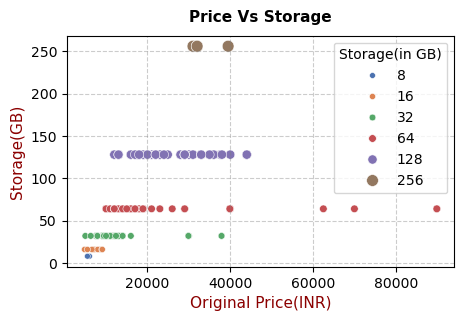

In [19]:
#call the mob_scatter() function
mob_scatter()

### PIE CHART

In [20]:
#define 'mob_pie_chart()' function
def mob_pie_chart():
    #Make a list of brands and store in 'brands' variable
    brands=['Apple','Redmi','POCO','Realme','Google','OPPO']
    #Take all the brands in list from datset and store in 'mob_brands' variable
    mob_brands=mob_data[mob_data['Brand'].isin(brands)]
    #now count the each brand using 'vale_counts()' function
    brand_counts = mob_brands['Brand'].value_counts()
    #Explode the maximum in brand_counts
    explode= [0.1 if i==brand_counts.argmax() else 0 for i in range(len(brand_counts))]
    #for figure size
    plt.figure(figsize=(5, 3))
    #plot piechart
    plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=190,explode=explode,shadow=True)
    #add legend
    plt.legend(brand_counts.index,title='Brands:',loc='center left',bbox_to_anchor=(0.9,0.5))
    #add axis position
    plt.axis('equal')
    #add title
    plt.title('Distribution of Brands on Flipkart Mobiles',size='11',pad=10,fontweight='bold')
    #show plot
    plt.show()

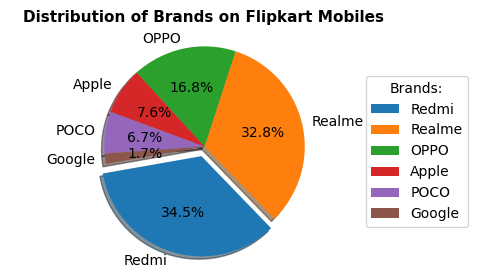

In [21]:
mob_pie_chart()

### HEATMAP

In [22]:
#define 'plot_heatmap()' function
def plot_heatmap():
    #selecet only number datatypes and store in 'corr_matrix' variable
    corr_matrix=mob_data.select_dtypes(include='number').corr()
    #Add figure size
    plt.figure(figsize=(5,3))
    #Plot heatmap
    sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',square='True')
    #add title
    plt.title('Correlation of Numeric Variables',fontweight='bold',color="black",size='11',pad=10)
    #show plot
    plt.show()

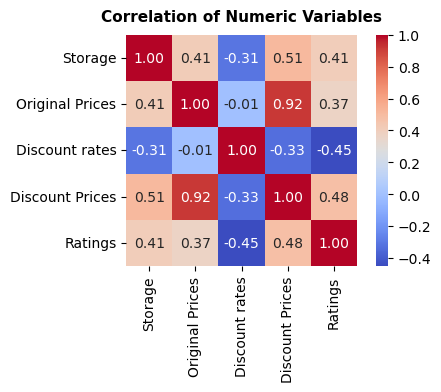

In [23]:
plot_heatmap()